# Business Understanding


## Problem Statement


The objective of this project is to develop a deep learning model that can accurately predict yoga poses from images. The problem is important because yoga is a popular form of exercise and meditation that can improve physical and mental health. By accurately predicting yoga poses from images, we can create tools and applications that can assist yoga practitioners in their practice, provide feedback on their form, and help them achieve their goals.

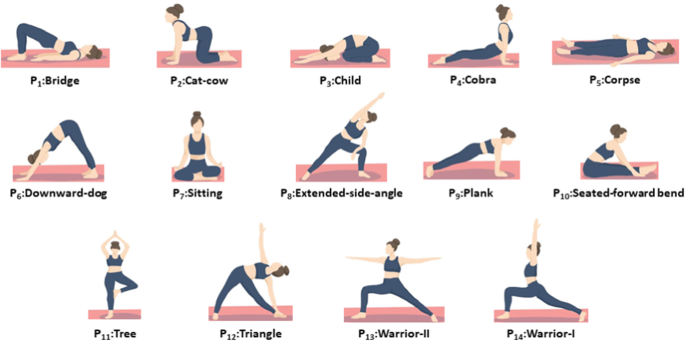

##Benefits of the Solution


**The potential benefits of the solution include:**


*   **Assisting Yoga Practitioners**: By accurately predicting yoga poses from images, we can create tools and applications that can assist yoga practitioners in their practice. For example, we can develop a mobile app that uses the camera to capture images of the user doing yoga poses, and provides feedback on their form, alignment, and balance.

*   **Providing Feedback:** The solution can provide feedback to the user on their form, alignment, and balance, which can help them improve their practice and reduce the risk of injury. This can be particularly useful for beginners who may not have access to a qualified yoga instructor.

*   **Measuring Progress:** By tracking the user's progress over time, the solution can provide insights into their practice and help them achieve their goals. For example, the user can see how much they have improved in a particular pose over time, or how consistent they are in their practice.

*   **Increasing Accessibility:** By providing a low-cost and accessible tool for yoga practitioners, the solution can increase the accessibility of yoga, particularly for those who may not have access to a yoga studio or a qualified instructor.







## Potential Users and Stakeholders
The potential users and stakeholders of the solution include:


*   **Yoga Practitioners**: The primary users of the solution are yoga practitioners who want to improve their practice, receive feedback on their form, and track their progress over time.

*   **Yoga Instructors**: Yoga instructors can also benefit from the solution by using it as a teaching tool in their classes, or by using it to provide personalized feedback to their students.

*   **Yoga Studios**: Yoga studios can also benefit from the solution by offering it as a value-added service to their clients, or by using it as a marketing tool to attract new clients.


*  **Investors**: Investors can also be stakeholders of the solution, particularly if the solution has the potential to become a profitable business.

##Success Criteria


The success of the solution can be measured by the following criteria:


*   **Accuracy**: The model should achieve a high accuracy in predicting yoga poses from images, with a target accuracy of at least 90% on a separate test set.

*   **Usability**: The solution should be easy to use and intuitive for yoga practitioners, with a user interface that is visually appealing and provides clear feedback on their form and progress.
*   **Generalizability**: The solution should be able to generalize to a wide range of yoga practitioners, poses, and environments, including different lighting conditions, backgrounds, and clothing.


*   **Scalability**: The solution should be scalable to handle large volumes of data and users, and should be able to handle different languages and cultures.
Ethical Considerations: The solution should adhere to ethical considerations, including data privacy, consent, and transparency.







# Data Collection / Understanding & Preparation

For The Data Collection process we did our researchfor publicly available datasets of labeled images of yoga poses. We did explore datasets such as the Yoga-82 and Deep Yoga datasets and found out that the data we were provided on this project and them overlap , for example the data that we were given is an extraction from this Kaggle [dataset](https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset)

# Environment and imports

In [1]:
!pip install rarfile
!apt-get install tree
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 43.0 kB of archives.
After this operation, 115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tree amd64 1.8.0-1 [43.0 kB]
Fetched 43.0 kB in 0s (162 kB/s)
Selecting previously unselected package tree.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../tree_1.8.0-1_amd64.deb ...
Unpacking tree (1.8.0-1) ...
Setting up tree (1.8.0-1) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 10.9 MB/s eta 0:00:00


In [2]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold
from google.colab import drive
import rarfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
import shap
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp /content/drive/MyDrive/YOGA.rar /content/

In [4]:
rar = rarfile.RarFile("/content/YOGA.rar")

In [5]:
rar.extractall("/content/Dataset")

In [6]:
!tree -d /content/Dataset/YOGA/content/cleaned/DATASET/

/content/Dataset/YOGA/content/cleaned/DATASET/
├── TEST
│   ├── downdog
│   ├── goddess
│   ├── plank
│   ├── tree
│   └── warrior2
└── TRAIN
    ├── downdog
    ├── goddess
    ├── plank
    ├── tree
    └── warrior2

12 directories


In [7]:
train_dir = '/content/Dataset/YOGA/content/cleaned/DATASET/TRAIN'
test_dir = '/content/Dataset/YOGA/content/cleaned/DATASET/TEST'

In [8]:
# Define the directory path
path = train_dir

# Get all subdirectories in the parent folder
subdirs = [subdir for subdir in os.listdir(path) if os.path.isdir(os.path.join(path, subdir))]
print("|--Train")
# Loop through each subdirectory and count the number of files
for subdir in subdirs:
  files = glob.glob(os.path.join(path, subdir, "*"))
  num_files = len(files)

  # Print the folder name and the number of files it contains
  print(f"      |--{subdir} ({num_files} files)")


path = test_dir
print("\n|--Test ")
# Get all subdirectories in the parent folder
subdirs = [subdir for subdir in os.listdir(path) if os.path.isdir(os.path.join(path, subdir))]

# Loop through each subdirectory and count the number of files
for subdir in subdirs:
  files = glob.glob(os.path.join(path, subdir, "*"))
  num_files = len(files)

  # Print the folder name and the number of files it contains
  print(f"      |--{subdir} ({num_files} files)")

|--Train
      |--goddess (178 files)
      |--warrior2 (250 files)
      |--plank (264 files)
      |--downdog (223 files)
      |--tree (160 files)

|--Test 
      |--goddess (77 files)
      |--warrior2 (109 files)
      |--plank (114 files)
      |--downdog (97 files)
      |--tree (69 files)


## Data preprocessing

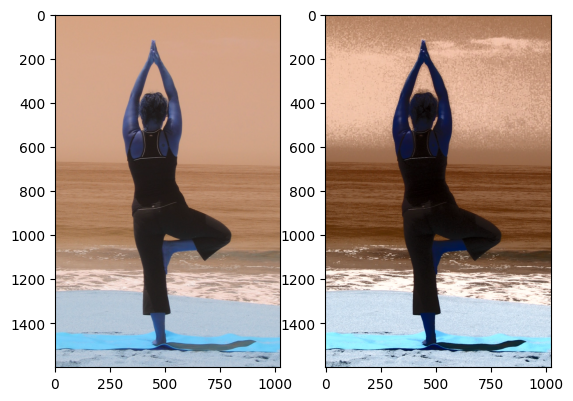

In [9]:
bgr_img = cv2.imread(train_dir+'/tree/00000070.jpg')

# convert from BGR color-space to YCrCb
ycrcb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2YCrCb)
 # equalize the histogram of the Y channel
ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
# convert back to BGR color-space from YCrCb
equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

plt.subplot(121),plt.imshow(bgr_img)

plt.subplot(122),plt.imshow(equalized_img)
plt.show()

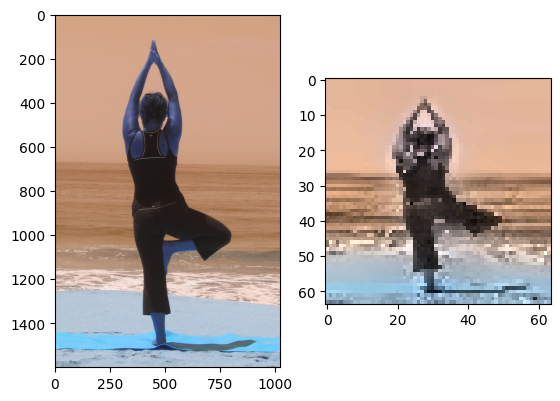

In [10]:
bgr_img = cv2.imread(train_dir+'/tree/00000070.jpg')
# dsize
dsize = (64,64)
resized_image = cv2.resize(bgr_img,dsize)
# convert from BGR color-space to YCrCb
ycrcb_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2YCrCb)
# create a CLAHE object 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# Now apply on the YCrCb image 
ycrcb_img[:, :, 0] = clahe.apply(ycrcb_img[:, :, 0])
# convert back to BGR color-space from YCrCb
equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

# Denoise is done to remove unwanted noise to better perform

equalized_denoised_image = cv2.fastNlMeansDenoisingColored(equalized_img, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(bgr_img)
plt.subplot(122),plt.imshow(equalized_denoised_image)
plt.show()

In [11]:
def preprocess_images(dataset_path):
    images_data = []
    images_label = []
    class_names = os.listdir(dataset_path)
    for class_name in class_names:
        images_path = dataset_path + '/' + class_name
        images = os.listdir(images_path)
        for image in images:
            bgr_img = cv2.imread(images_path + '/' + image)
            # dsize
            dsize = (64,64)
            #resize image
            resized_image = cv2.resize(bgr_img,dsize)
            # convert from BGR color-space to YCrCb
            ycrcb_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2YCrCb)
            # create a CLAHE object 
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            # Now apply CLAHE object on the YCrCb image
            ycrcb_img[:, :, 0] = clahe.apply(ycrcb_img[:, :, 0])
            # convert back to BGR color-space from YCrCb
            equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
            # Denoise is done to remove unwanted noise to better perform
            equalized_denoised_image = cv2.fastNlMeansDenoisingColored(equalized_img, None, 10, 10, 7, 21)
            
            images_data.append(equalized_denoised_image/255)
            images_label.append(class_name)
    images_data = np.array(images_data)
    images_label = np.array(images_label)
    return images_data, images_label

In [12]:
train_images_data, train_images_label = preprocess_images(train_dir)

In [13]:
def encoding_targets(labels):
    le = preprocessing.LabelEncoder()
    images_label = le.fit_transform(labels)
    return images_label

In [14]:
class_names = os.listdir(train_dir)
class_num = len(class_names)
train_images_label = encoding_targets(train_images_label)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
epochs = 20
learning_rate = 0.001
opt = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5))
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
kfold = KFold(n_splits=5, shuffle=True,random_state=2)
val_acc_per_fold = []
val_loss_per_fold = []
loss_per_fold = []
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, valid in kfold.split(train_images_data, train_images_label):
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(train_images_data[train], train_images_label[train], batch_size=16, 
                        epochs=epochs, validation_data=(train_images_data[valid],
                        train_images_label[valid]))
    val_acc_per_fold.append(history.history['val_accuracy'])
    acc_per_fold.append(history.history['accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])
    loss_per_fold.append(history.history['loss'])
    # Increase fold number
    fold_no += 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
54/54 [==============================] - 9s 14ms/step - loss: 1.5646 - accuracy: 0.2977 - val_loss: 1.3802 - val_accuracy: 0.4140
Epoch 2/20
54/54 [==============================] - 0s 5ms/step - loss: 1.2238 - accuracy: 0.5302 - val_loss: 1.2040 - val_accuracy: 0.5907
Epoch 3/20
54/54 [==============================] - 0s 9ms/step - loss: 0.9800 - accuracy: 0.6163 - val_loss: 0.9572 - val_accuracy: 0.6558
Epoch 4/20
54/54 [==============================] - 1s 10ms/step - loss: 0.7619 - accuracy: 0.7023 - val_loss: 0.7997 - val_accuracy: 0.7116
Epoch 5/20
54/54 [==============================] - 0s 5ms/step - loss: 0.5379 - accuracy: 0.8000 - val_loss: 0.7900 - val_accuracy: 0.7721
Epoch 6/20
54/54 [==============================] - 1s 10ms/step - loss: 0.3550 - accuracy: 0.8895 - val_loss: 0.9257 - val_accuracy: 0.6512
Epoch 7/20
54/54 [==============================] - 0s 8ms/s

### Evaluation and Optimization

In [19]:
# convert to NumPy arrays with NaNs for missing values
acc_array = np.full((len(acc_per_fold), max(map(len, acc_per_fold))), np.nan)
for i, acc in enumerate(acc_per_fold):
    acc_array[i, :len(acc)] = acc

val_acc_array = np.full((len(val_acc_per_fold), max(map(len, val_acc_per_fold))), np.nan)
for i, val_acc in enumerate(val_acc_per_fold):
    val_acc_array[i, :len(val_acc)] = val_acc

# calculate mean and standard deviation along axis=0
acc_mean = np.nanmean(acc_array, axis=0)
acc_std = np.nanstd(acc_array, axis=0)

val_acc_mean = np.nanmean(val_acc_array, axis=0)
val_acc_std = np.nanstd(val_acc_array, axis=0)

# print results
print(f'> Training_Accuracy: {np.mean(acc_mean)*100:.2f} (+- {np.std(acc_mean):.2f})')
print(f'> Validation_Accuracy: {np.mean(val_acc_mean)*100:.2f} (+- {np.std(val_acc_mean):.2f})')

> Training_Accuracy: 97.25 (+- 0.04)
> Validation_Accuracy: 93.99 (+- 0.02)


**Evaluating on the test set**

In [20]:
test_images_data, test_images_label = preprocess_images(test_dir)
test_images_label = encoding_targets(test_images_label)

15/15 [==============================] - 0s 9ms/step
Test Data accuracy:  85.40772532188842

Confusion Matrix : 


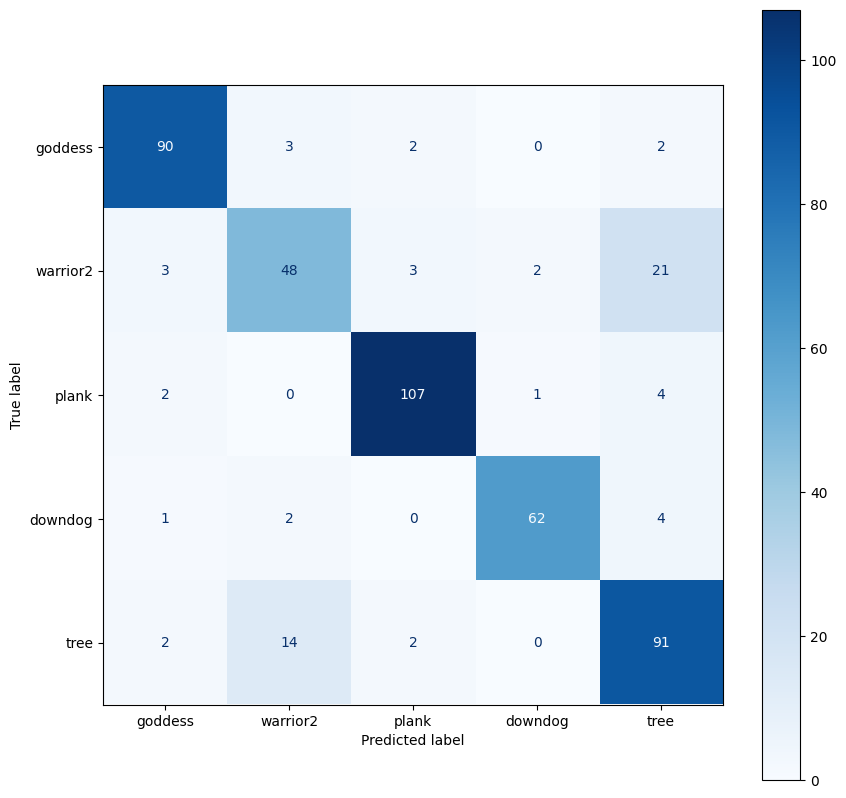

In [21]:
predict = np.argmax(model.predict(np.array(test_images_data)),axis=1)
print('Test Data accuracy: ',accuracy_score(test_images_label, predict)*100)
print("\nConfusion Matrix : ")
cnf_matrix = confusion_matrix(test_images_label, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = class_names)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [22]:
print("\nClassification Report :")
print(classification_report(test_images_label, predict, target_names=class_names))


Classification Report :
              precision    recall  f1-score   support

     goddess       0.92      0.93      0.92        97
    warrior2       0.72      0.62      0.67        77
       plank       0.94      0.94      0.94       114
     downdog       0.95      0.90      0.93        69
        tree       0.75      0.83      0.79       109

    accuracy                           0.85       466
   macro avg       0.85      0.84      0.85       466
weighted avg       0.85      0.85      0.85       466



**There is obviously some overfitting going on here , (from 86 accuracy on test set to 0.94 on validation set**

**Optimizing using DataAugmentation + L2 regulization + Dropout**

In [44]:
dataAugmentaion = ImageDataGenerator(rotation_range = 10, zoom_range = 0.25, horizontal_flip=True, 
                                        fill_mode = "nearest", shear_range = 0.30)

In [45]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
epochs = 30
opt = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5))
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [46]:
# Define per-fold score containers
val_acc_per_fold = []
val_loss_per_fold = []
loss_per_fold = []
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, valid in kfold.split(train_images_data, train_images_label):
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit_generator(dataAugmentaion.flow(train_images_data[train], train_images_label[train], batch_size=16),
                                  epochs=epochs,
                                  validation_data=(train_images_data[valid], train_images_label[valid]), callbacks=[early_stopping])
    val_acc_per_fold.append(history.history['val_accuracy'])
    acc_per_fold.append(history.history['accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])
    loss_per_fold.append(history.history['loss'])
    # Increase fold number
    fold_no += 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30


`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


54/54 [==============================] - 2s 29ms/step - loss: 1.8848 - accuracy: 0.2093 - val_loss: 1.7140 - val_accuracy: 0.2558
Epoch 2/30
54/54 [==============================] - 1s 21ms/step - loss: 1.6866 - accuracy: 0.2535 - val_loss: 1.5538 - val_accuracy: 0.3721
Epoch 3/30
54/54 [==============================] - 1s 21ms/step - loss: 1.4940 - accuracy: 0.4081 - val_loss: 1.4213 - val_accuracy: 0.4791
Epoch 4/30
54/54 [==============================] - 1s 21ms/step - loss: 1.3371 - accuracy: 0.4849 - val_loss: 1.2442 - val_accuracy: 0.5116
Epoch 5/30
54/54 [==============================] - 1s 21ms/step - loss: 1.1846 - accuracy: 0.5488 - val_loss: 1.1346 - val_accuracy: 0.6047
Epoch 6/30
54/54 [==============================] - 1s 22ms/step - loss: 1.1106 - accuracy: 0.5837 - val_loss: 1.1951 - val_accuracy: 0.5674
Epoch 7/30
54/54 [==============================] - 1s 22ms/step - loss: 1.0507 - accuracy: 0.5930 - val_loss: 0.9933 - val_accuracy: 0.6465
Epoch 8/30
54/54 [======

In [47]:
# convert to NumPy arrays with NaNs for missing values
acc_array = np.full((len(acc_per_fold), max(map(len, acc_per_fold))), np.nan)
for i, acc in enumerate(acc_per_fold):
    acc_array[i, :len(acc)] = acc

val_acc_array = np.full((len(val_acc_per_fold), max(map(len, val_acc_per_fold))), np.nan)
for i, val_acc in enumerate(val_acc_per_fold):
    val_acc_array[i, :len(val_acc)] = val_acc

# calculate mean and standard deviation along axis=0
acc_mean = np.nanmean(acc_array, axis=0)
acc_std = np.nanstd(acc_array, axis=0)

val_acc_mean = np.nanmean(val_acc_array, axis=0)
val_acc_std = np.nanstd(val_acc_array, axis=0)

# print results
print(f'> Training_Accuracy: {np.mean(acc_mean)*100:.2f} (+- {np.std(acc_mean):.2f})')
print(f'> Validation_Accuracy: {np.mean(val_acc_mean)*100:.2f} (+- {np.std(val_acc_mean):.2f})')

> Training_Accuracy: 78.13 (+- 0.05)
> Validation_Accuracy: 78.12 (+- 0.04)


15/15 [==============================] - 0s 3ms/step
Test Data accuracy:  91.41630901287554

Confusion Matrix : 


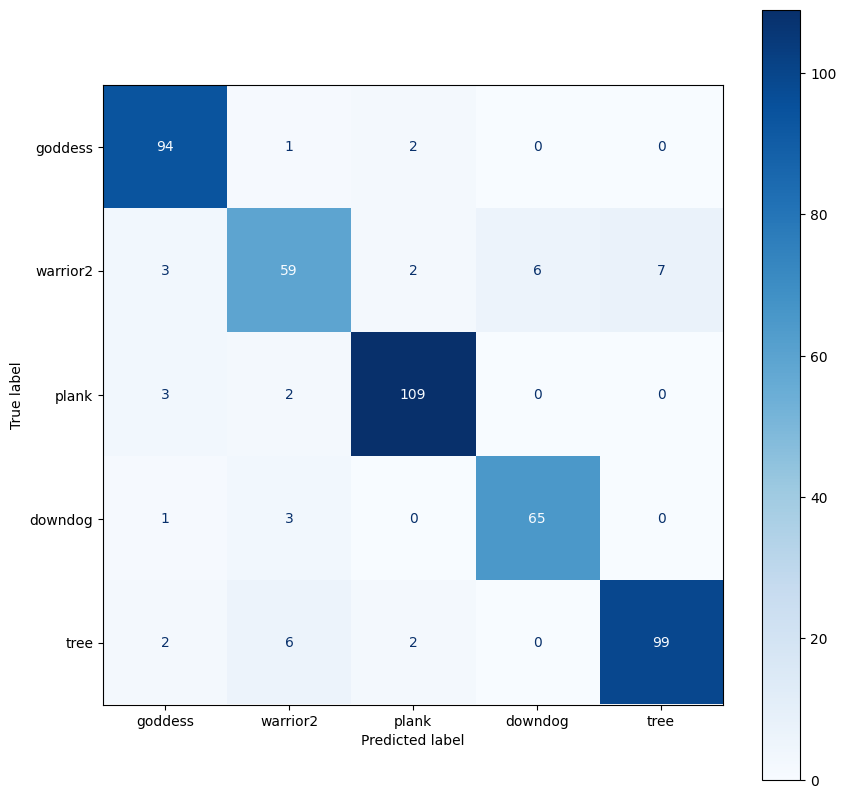

In [48]:
predict = np.argmax(model.predict(np.array(test_images_data)),axis=1)
print('Test Data accuracy: ',accuracy_score(test_images_label, predict)*100)
print("\nConfusion Matrix : ")
cnf_matrix = confusion_matrix(test_images_label, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = class_names)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

**+ Using the model checkpoint to save the best model**

In [49]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
# Define per-fold score containers
val_acc_per_fold = []
val_loss_per_fold = []
loss_per_fold = []
acc_per_fold = []
# K-fold Cross Validation model evaluation
fold_no = 1
model.reset_states()
for train, valid in kfold.split(train_images_data, train_images_label):
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit_generator(dataAugmentaion.flow(train_images_data[train], train_images_label[train], batch_size=16),
                                  epochs=epochs,
                                  validation_data=(train_images_data[valid], train_images_label[valid]), callbacks=[early_stopping,checkpoint])
    val_acc_per_fold.append(history.history['val_accuracy'])
    acc_per_fold.append(history.history['accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])
    loss_per_fold.append(history.history['loss'])
    # Increase fold number
    fold_no += 1
model = load_model('best_model.h5')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30
 4/54 [=>............................] - ETA: 0s - loss: 0.1430 - accuracy: 1.0000

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


54/54 [==============================] - ETA: 0s - loss: 0.3141 - accuracy: 0.9302
Epoch 1: val_loss improved from inf to 0.21007, saving model to best_model.h5
54/54 [==============================] - 1s 24ms/step - loss: 0.3141 - accuracy: 0.9302 - val_loss: 0.2101 - val_accuracy: 0.9535
Epoch 2/30
52/54 [===========================>..] - ETA: 0s - loss: 0.3149 - accuracy: 0.9191
Epoch 2: val_loss improved from 0.21007 to 0.17123, saving model to best_model.h5
54/54 [==============================] - 1s 22ms/step - loss: 0.3168 - accuracy: 0.9186 - val_loss: 0.1712 - val_accuracy: 0.9721
Epoch 3/30
52/54 [===========================>..] - ETA: 0s - loss: 0.2874 - accuracy: 0.9239
Epoch 3: val_loss did not improve from 0.17123
54/54 [==============================] - 1s 21ms/step - loss: 0.2870 - accuracy: 0.9233 - val_loss: 0.1854 - val_accuracy: 0.9674
Epoch 4/30
54/54 [==============================] - ETA: 0s - loss: 0.2658 - accuracy: 0.9430
Epoch 4: val_loss did not improve from

15/15 [==============================] - 0s 2ms/step
Test Data accuracy:  92.4892703862661

Confusion Matrix : 


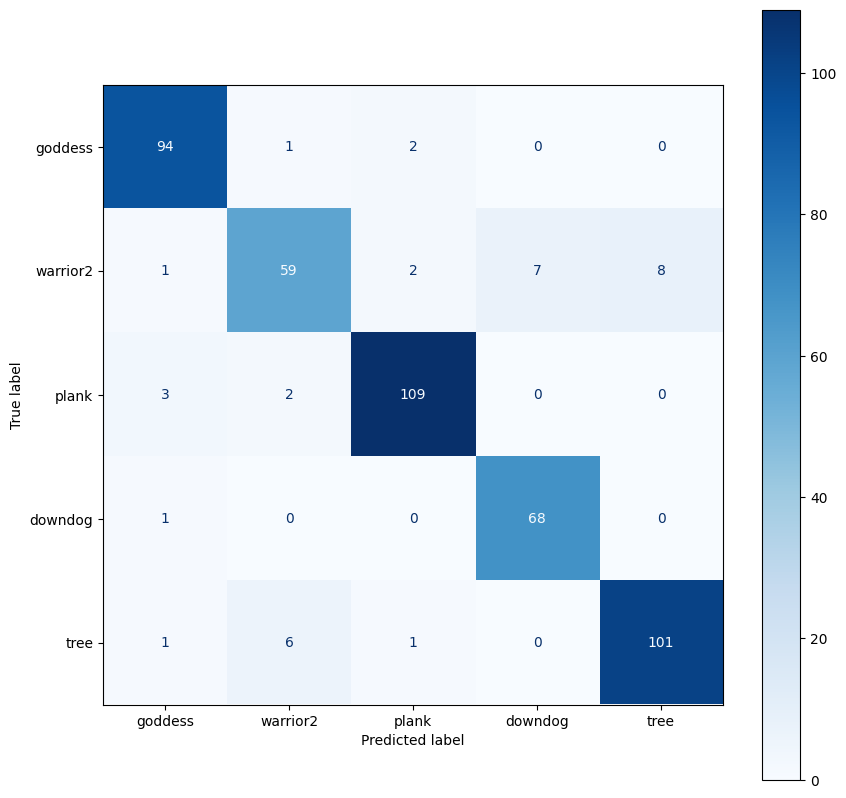

In [50]:
predict = np.argmax(model.predict(np.array(test_images_data)),axis=1)
print('Test Data accuracy: ',accuracy_score(test_images_label, predict)*100)
print("\nConfusion Matrix : ")
cnf_matrix = confusion_matrix(test_images_label, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = class_names)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [51]:
print("\nClassification Report :")
print(classification_report(test_images_label, predict, target_names=class_names))


Classification Report :
              precision    recall  f1-score   support

     goddess       0.94      0.97      0.95        97
    warrior2       0.87      0.77      0.81        77
       plank       0.96      0.96      0.96       114
     downdog       0.91      0.99      0.94        69
        tree       0.93      0.93      0.93       109

    accuracy                           0.92       466
   macro avg       0.92      0.92      0.92       466
weighted avg       0.92      0.92      0.92       466



The chart was taken from a kaggle notebook that shows the actual image and parts of it highlighted in shades of red and blue colors. The shades of red color show parts that contributed positively and shades of blue color show parts that contributed negatively to the prediction of that category.

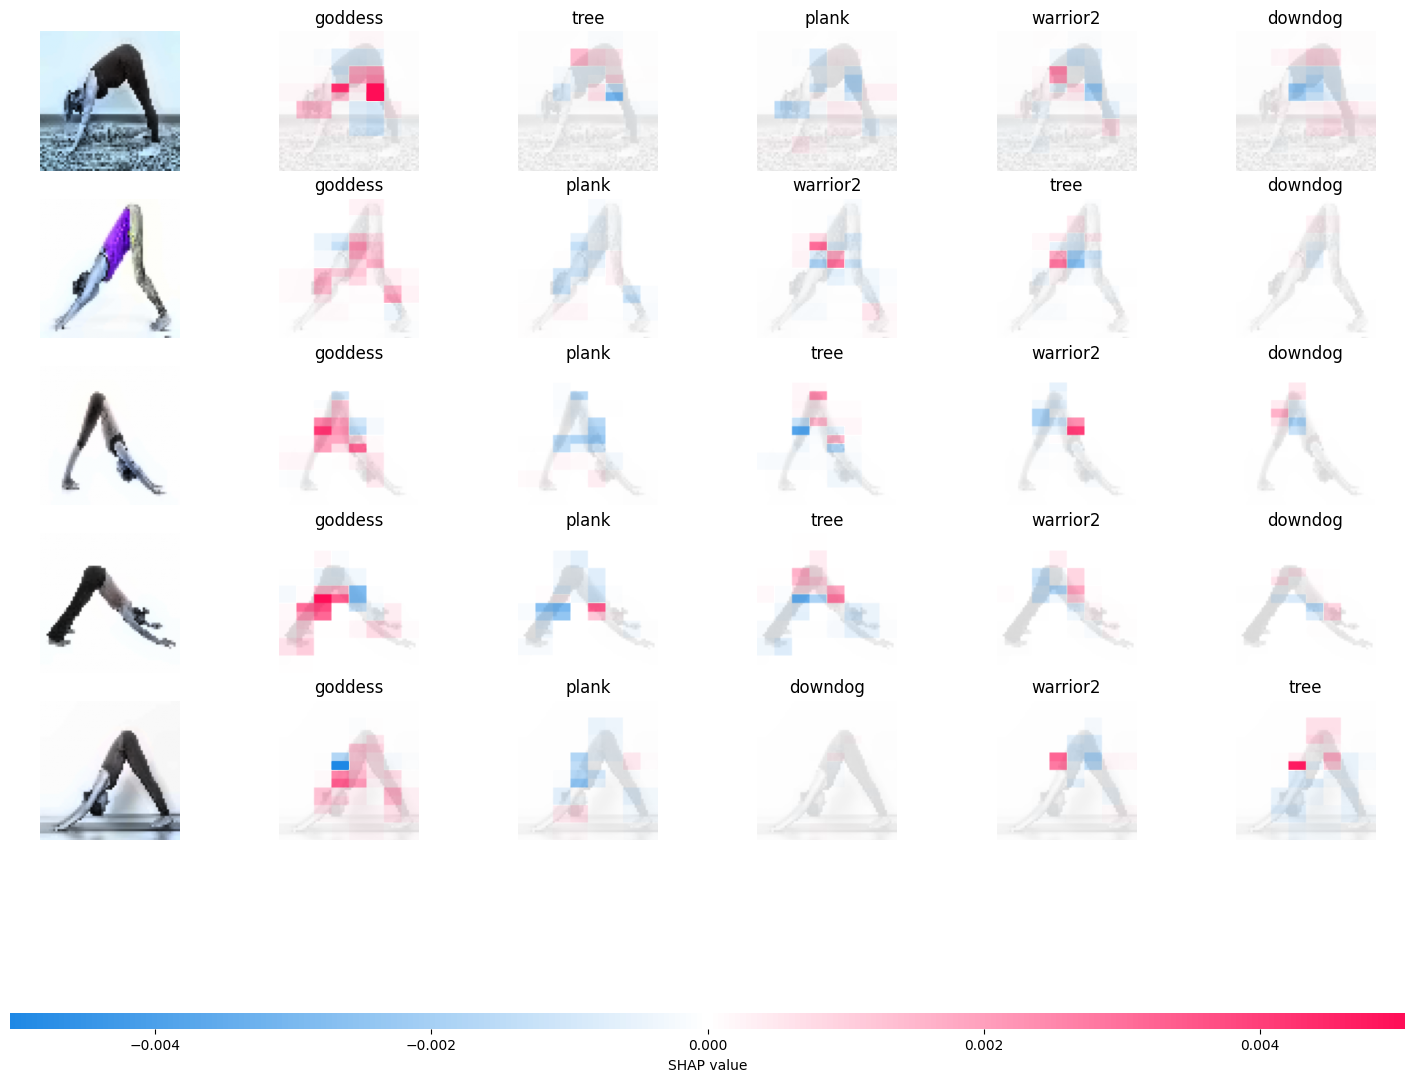

In [52]:
shap.initjs()
#Masker to mask parts of an image using blurring
masker = shap.maskers.Image("blur(64,64)", train_images_data[0].shape)
#Explainer() constructor by default creates an instance of Partition explainer
explainer = shap.Explainer(model, masker, output_names=class_names)
#generate shap values for images using the explainer object
shap_values = explainer(test_images_data[361:366], outputs=shap.Explanation.argsort.flip[:5])
shap.image_plot(shap_values)